In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [17]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [27]:
species = df['Species'].unique()
numeric = df.select_dtypes(include='float64')

In [20]:
group = df.groupby('Species')

In [33]:
for s in species:
    individual_species = group.get_group(s)
    print('\nSpecies : ', s, '\n')
    print(individual_species.describe())


Species :  Iris-setosa 

             Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  50.00000       50.00000     50.000000      50.000000      50.00000
mean   25.50000        5.00600      3.418000       1.464000       0.24400
std    14.57738        0.35249      0.381024       0.173511       0.10721
min     1.00000        4.30000      2.300000       1.000000       0.10000
25%    13.25000        4.80000      3.125000       1.400000       0.20000
50%    25.50000        5.00000      3.400000       1.500000       0.20000
75%    37.75000        5.20000      3.675000       1.575000       0.30000
max    50.00000        5.80000      4.400000       1.900000       0.60000

Species :  Iris-versicolor 

              Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count   50.00000      50.000000     50.000000      50.000000     50.000000
mean    75.50000       5.936000      2.770000       4.260000      1.326000
std     14.57738       0.516171      0.313798       0

In [36]:
def statistic(data):
    mean = sum(data) / len(data)
    variance = (sum((x-mean)**2 for x in data))/(len(data)-1)
    std = variance ** 0.5
    print('Mean : ', mean)
    print('Variance : ', variance)
    print('Standard Deviation : ', std)

In [39]:
for s in species:
    new_data = group.get_group(s)
    for i in numeric:
        print("\n",s, " - ", i, "\n")
        statistic(new_data[i])


 Iris-setosa  -  SepalLengthCm 

Mean :  5.005999999999999
Variance :  0.12424897959183666
Standard Deviation :  0.3524896872134512

 Iris-setosa  -  SepalWidthCm 

Mean :  3.4180000000000006
Variance :  0.1451795918367347
Standard Deviation :  0.38102439795469095

 Iris-setosa  -  PetalLengthCm 

Mean :  1.464
Variance :  0.030106122448979603
Standard Deviation :  0.1735111594364455

 Iris-setosa  -  PetalWidthCm 

Mean :  0.2439999999999999
Variance :  0.011493877551020404
Standard Deviation :  0.10720950308167837

 Iris-versicolor  -  SepalLengthCm 

Mean :  5.936
Variance :  0.2664326530612246
Standard Deviation :  0.5161711470638635

 Iris-versicolor  -  SepalWidthCm 

Mean :  2.7700000000000005
Variance :  0.09846938775510206
Standard Deviation :  0.3137983233784114

 Iris-versicolor  -  PetalLengthCm 

Mean :  4.26
Variance :  0.22081632653061237
Standard Deviation :  0.46991097723995806

 Iris-versicolor  -  PetalWidthCm 

Mean :  1.3259999999999998
Variance :  0.0391061224489

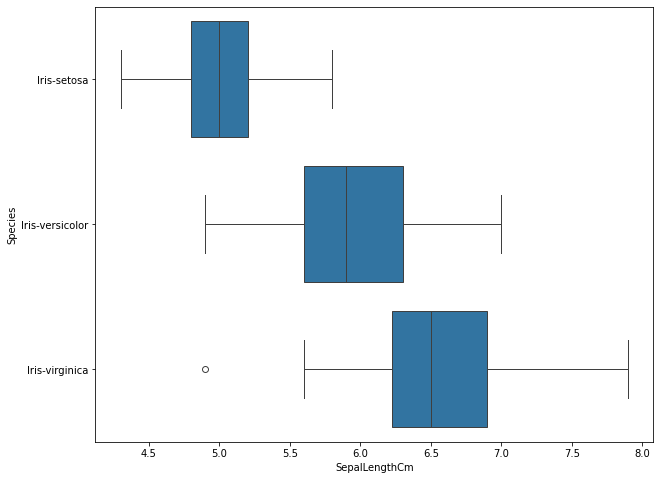

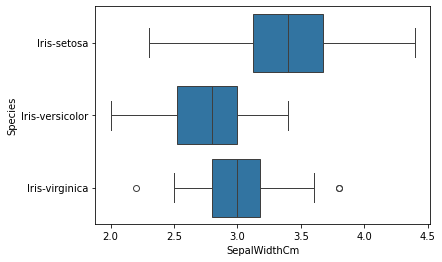

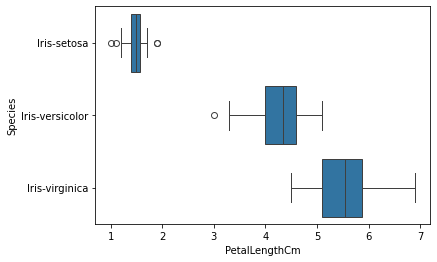

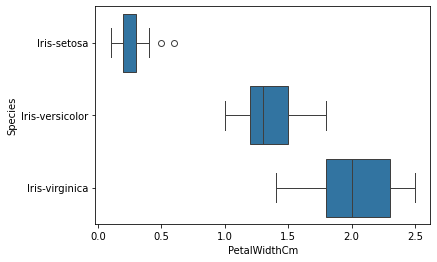

In [59]:
plt.figure(figsize=(10,8))
for n in numeric:
    sns.boxplot(x=n, y='Species', data=df)
    plt.show()